In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [297]:
data=pd.read_csv("After_EDA.csv",index_col=0)
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
242,3,139.0,54.0,29.0,125.0,25.6,0.402,22,1
55,1,73.0,50.0,10.0,125.0,23.0,0.248,21,0
594,6,123.0,72.0,45.0,230.0,33.6,0.733,34,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
463,5,88.0,78.0,30.0,125.0,27.6,0.258,37,0


In [298]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### outlier in a dataset using Inter quartile Range(IQR)

<AxesSubplot:ylabel='BMI'>

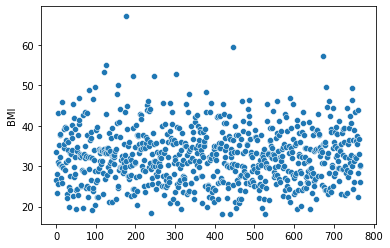

In [299]:
sns.scatterplot(data=data.BMI)

It Looks Like We have some outliars in a data-set

In [300]:
data.BMI.describe()

count    768.000000
mean      32.455208
std        6.875177
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [301]:
# Let's Find out Q1,Q2,Q3
data.BMI.quantile([0.25,0.50,0.75])

0.25    27.5
0.50    32.3
0.75    36.6
Name: BMI, dtype: float64

we Got,

Q1= 27.5

Q2=32.3

Q3=36.6

So,Let's Findout IQR

In [302]:
Q1=27.5
Q3=36.6
IQR=Q3-Q1
print("IQR IS",IQR)

IQR IS 9.100000000000001


In [303]:
# Calculate High And Low Value Using IQR
High=Q3+1.5*IQR
Low=Q1-1.5*IQR
print("High Value Is",High)
print("Low Value Is",Low)

High Value Is 50.25
Low Value Is 13.849999999999998


In [304]:
df=data.copy()

In [305]:
df=df[df['BMI']<=High]
df=df[df['BMI']>=Low]

<AxesSubplot:ylabel='BMI'>

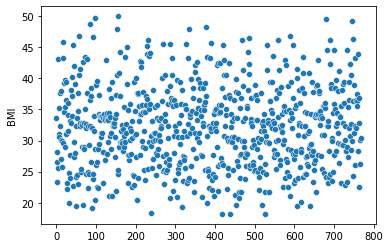

In [306]:
#After REmoving the Outliars
sns.scatterplot(data=df.BMI)

In [307]:
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
66,0,109.0,88.0,30.0,125.0,32.5,0.855,38,1
510,12,84.0,72.0,31.0,125.0,29.7,0.297,46,1
692,2,121.0,70.0,32.0,95.0,39.1,0.886,23,0


In [308]:
print("Total Number's Of Outliar ",data.shape[0]-df.shape[0])

Total Number's Of Outliar  8


In [309]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [310]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [311]:
print(model.feature_importances_)

[0.10105778 0.29529141 0.08679554 0.06923347 0.07197687 0.14078297
 0.10235329 0.13250867]


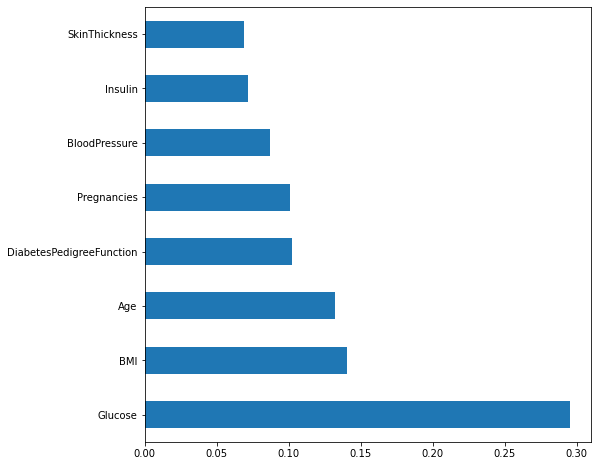

In [312]:
plt.figure(figsize=(8,8))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(8).plot(kind='barh')
plt.show()

### Summary

i.> Outcome and Glucose have strong conncetion 

In [313]:
Dict_For_Zero_Value=dict()
for i in df.columns:
    Dict_For_Zero_Value[i]=df[df[i]==0].shape[0]
Dict_For_Zero_Value

{'Pregnancies': 107,
 'Glucose': 0,
 'BloodPressure': 0,
 'SkinThickness': 0,
 'Insulin': 0,
 'BMI': 0,
 'DiabetesPedigreeFunction': 0,
 'Age': 0,
 'Outcome': 498}

In [314]:
df.SkinThickness.min()

7.0

In [316]:
df.SkinThickness[df.SkinThickness==7]

254    7.0
519    7.0
Name: SkinThickness, dtype: float64

### Data Normalization
Normalization (min-max Normalization)

In this approach we scale down the feature in  between 0 to 1

In [275]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()

In [276]:
col_for_nor=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
            'BMI','DiabetesPedigreeFunction','Age']

In [277]:
df[col_for_nor]=scaling.fit_transform(df[col_for_nor])

In [278]:
df.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
532,0.058824,0.270968,0.428571,0.48913,0.060168,0.726415,0.372723,0.133333,0
749,0.352941,0.761290,0.387755,0.23913,0.132371,0.191824,0.044425,0.483333,1


Let's Check ,If Data-set is imbalance or Not

In [279]:
print(df[df['Outcome']==0].shape[0])
print(df[df['Outcome']==1].shape[0])

498
262


In [280]:
Arry_List=[df[df['Outcome']==0].shape[0],df[df['Outcome']==1].shape[0]]

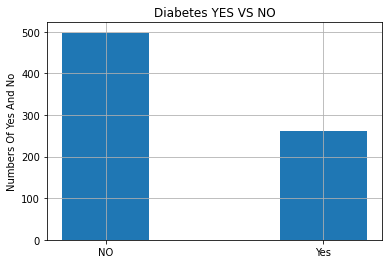

In [281]:
plt.bar(['NO','Yes'],Arry_List,width=0.4,)
plt.title("Diabetes YES VS NO")
plt.ylabel("Numbers Of Yes And No")
plt.grid(True)
plt.show()

We Have 498 of No but Only 262 is Yes. That means, our Data Set is Imbalanced .

In [282]:
df.shape

(760, 9)

In [283]:
df1=df.copy()

In [284]:
count_class_0, count_class_1 = df.Outcome.value_counts()
count_class_0, count_class_1

(498, 262)

In [285]:
# Divide by class
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

In [286]:
print(df_class_0.shape)
print(df_class_1.shape)

(498, 9)
(262, 9)


In [287]:
Dict_For_Zero_Value=dict()
for i in df.columns:
    Dict_For_Zero_Value[i]=df[df[i]==0].shape[0]
Dict_For_Zero_Value

{'Pregnancies': 107,
 'Glucose': 1,
 'BloodPressure': 1,
 'SkinThickness': 2,
 'Insulin': 1,
 'BMI': 3,
 'DiabetesPedigreeFunction': 1,
 'Age': 63,
 'Outcome': 498}

##### Let's Handle Imblanced Data Using Oversampling the minority class

In [288]:
df_class_1_over=df_class_1.sample(df_class_0.shape[0],replace=True,random_state=23)
after_over_sample=pd.concat([df_class_0,df_class_1_over],axis=0)

In [289]:
print('Random over-sampling:')
print(after_over_sample.Outcome.value_counts())

Random over-sampling:
0    498
1    498
Name: Outcome, dtype: int64


In [290]:
after_over_sample.shape

(996, 9)

In [291]:
Dict_For_Zero_Value=dict()
for i in after_over_sample.columns:
    Dict_For_Zero_Value[i]=after_over_sample[after_over_sample[i]==0].shape[0]
Dict_For_Zero_Value

{'Pregnancies': 133,
 'Glucose': 1,
 'BloodPressure': 1,
 'SkinThickness': 3,
 'Insulin': 1,
 'BMI': 3,
 'DiabetesPedigreeFunction': 1,
 'Age': 67,
 'Outcome': 498}

In [292]:
after_over_sample.sample(2,random_state=4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
631,0.000000,0.374194,0.551020,0.358696,0.090253,0.512579,0.071080,0.05,0
312,0.117647,0.716129,0.510204,0.108696,0.097473,0.264151,0.157708,0.10,1


In [293]:
after_over_sample.to_csv("Data_For_Final_Model.csv")